In [1]:
import hdf5_getters
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'test_dataset.h5'

In [3]:
h5 = hdf5_getters.open_h5_file_read(path)

tempo = hdf5_getters.get_tempo(h5)

h5.close()

In [4]:
def get_stat_filtered_by_years(basedir, stat,ext='.h5') :
    titles = {"tape": [], "vinyl": [], "kassette": [], "cd": [], "mp3": []}
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files:
            try:
                h5 = hdf5_getters.open_h5_file_read(f)
                
                year = hdf5_getters.get_year(h5)
                
                if year < 1926:
                    continue
                elif year < 1947:
                    titles["tape"].append(stat(h5))
                elif year < 1967:
                    titles["vinyl"].append(stat(h5))
                elif year < 1967:
                    titles["kassette"].append(stat(h5))
                elif year < 1967:
                    titles["cd"].append(stat(h5))
                else: 
                    titles["mp3"].append(stat(h5))
                
                h5.close()
                
            except:
                pass
    return titles

In [5]:
tempo = get_stat_filtered_by_years("MillionSongSubset", hdf5_getters.get_tempo)

In [27]:
def showViolinPlot(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.violinplot(data, showmeans=True, showmedians=True)
    plt.show()

In [7]:
def showHistogram(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.hist(data, bins=int(max(data)-min(data)))
    plt.show()

# Tape

In [8]:
pd.DataFrame(tempo["tape"]).describe()

,0
count,12.000000
mean,101.429167
std,28.320264
min,38.443000
25%,96.737000
50%,100.562000
75%,107.280000
max,158.767000


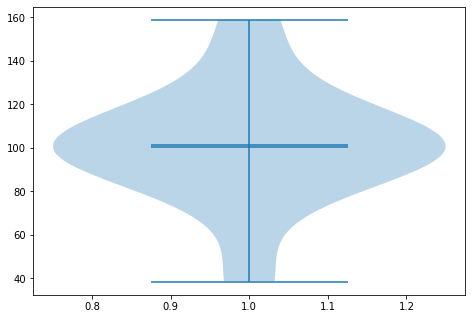

In [28]:
showViolinPlot(tempo["tape"])

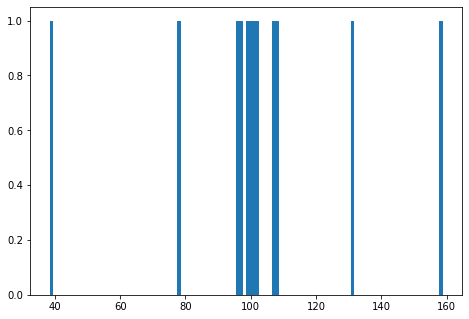

In [10]:
showHistogram(tempo["tape"])

In [11]:
# Vinyl

In [12]:
pd.DataFrame(tempo["vinyl"]).describe()

,0
count,62.000000
mean,114.560226
std,30.954589
min,59.983000
25%,95.295250
50%,108.712000
75%,129.865250
max,196.303000


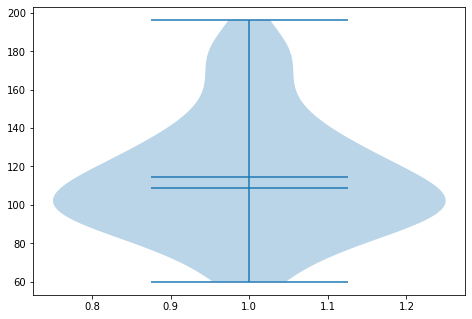

In [29]:
showViolinPlot(tempo["vinyl"])

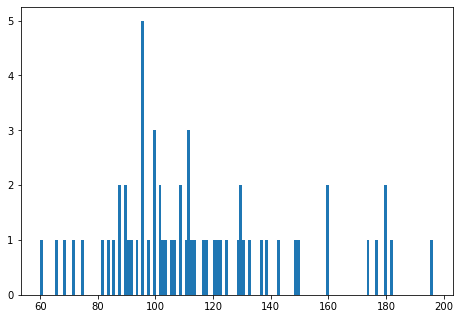

In [14]:
showHistogram(tempo["vinyl"])

In [15]:
# Kassette

In [30]:
pd.DataFrame(tempo["kassette"]).describe()

ValueError: Cannot describe a DataFrame without columns

In [ ]:
showViolinPlot(tempo["kassette"])

In [ ]:
showHistogram(tempo["kassette"])

In [ ]:
# CD

In [31]:
pd.DataFrame(tempo["cd"]).describe()

ValueError: Cannot describe a DataFrame without columns

In [ ]:
showViolinPlot(tempo["cd"])

In [ ]:
showHistogram(tempo["cd"])

In [ ]:
# MP3

In [32]:
pd.DataFrame(tempo["mp3"]).describe()

,0
count,3215.000000
mean,125.987034
std,35.944178
min,0.000000
25%,98.875000
50%,122.838000
75%,148.036000
max,258.677000


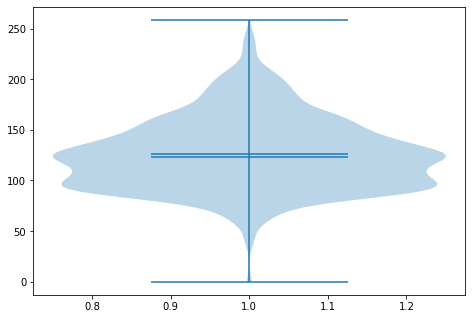

In [33]:
showViolinPlot(tempo["mp3"])

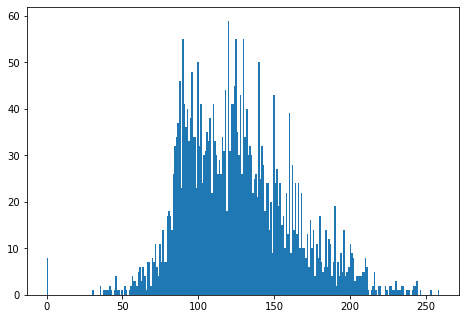

In [34]:
showHistogram(tempo["mp3"])